In [1]:
import pandas as pd
import json

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

import string
import re

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lqlau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lqlau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("Voice of Customer.csv")

In [3]:
df1 = df[~df["voice of customer"].str.contains("NIL")].reset_index(drop=True)
df1

,id,satisfaction,satisfaction score,voice of customer
0,72,neutral or dissatisfied,3,The emotional toll of the experience was overw...
1,93,neutral or dissatisfied,3,The extended wait for flight arrival was highl...
2,109,neutral or dissatisfied,4,The airline did not provide any updates during...
3,147,neutral or dissatisfied,4,The airline did not provide any compensation f...
4,244,neutral or dissatisfied,4,The airline charged excessive fees for baggage.
...,...,...,...,...
2158,129647,neutral or dissatisfied,3,Faulty and unreliable onboard entertainment sy...
2159,129709,neutral or dissatisfied,4,The cabin lacked proper disposal for used napk...
2160,129721,neutral or dissatisfied,4,The airline lacked efficiency in managing flig...
2161,129814,neutral or dissatisfied,4,I encountered a delay in receiving my requeste...


<h1> Preprocessing </h1> 

1. Convert to lowercase
2. Convert contractions
3. Remove puncutations
4. Remove numbers
5. remove stopwords
6. Optional: remove airline, flight, passenger from wordcloud

In [4]:
with open ('./contractions.json') as f:
    contractions_dict = json.load(f)

def contractions_cleaning(sentence):
    return ' '.join([contractions_dict.get(word, word) for word in sentence.split()])

In [5]:
def sentence_preprocessing(df, col):
    df[col] = df[col].str.lower() # convert to lowercase
    df[col] = df[col].apply(contractions_cleaning) # expand contractions
    df[col] = df[col].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x)) # remove puncutations
    df[col] = df[col].apply(lambda x : re.sub(r"\d+", " ", x)) # remove numbers
    return df[col]

def remove_stopwords(sentence):
    return ' '.join([word for word in sentence.split() if not word in stop_words])

In [6]:
df1['voice of customer'] = sentence_preprocessing(df1, 'voice of customer')

stop_words = set(stopwords.words('english'))

df1['voice of customer'] = df1['voice of customer'].apply(remove_stopwords)

In [7]:
# df1['voice of customer'] = df1['voice of customer'].str.replace("airline", "")
# df1['voice of customer'] = df1['voice of customer'].str.replace("flight", "")
# df1['voice of customer'] = df1['voice of customer'].str.replace("passenger", "")

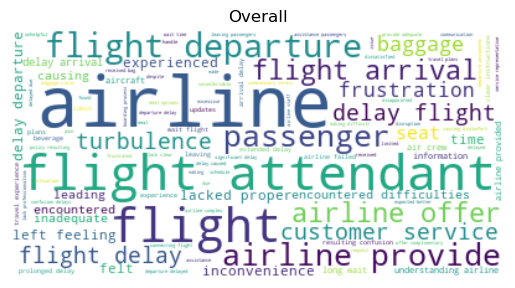

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
text = ' '.join([word for word in df1['voice of customer']])
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Overall")
plt.savefig("./images/overall.png")
plt.show()

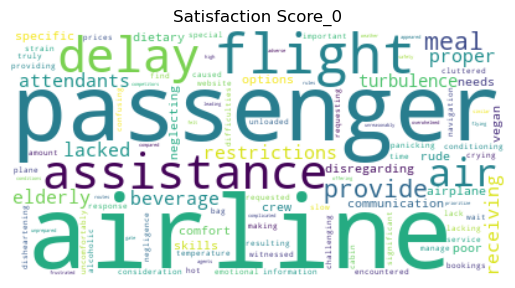

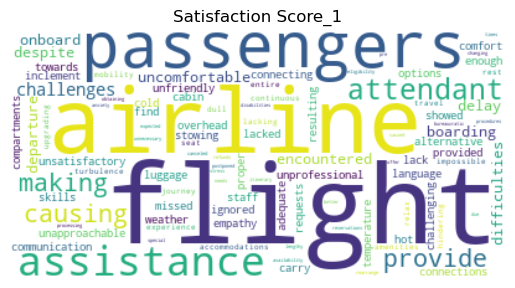

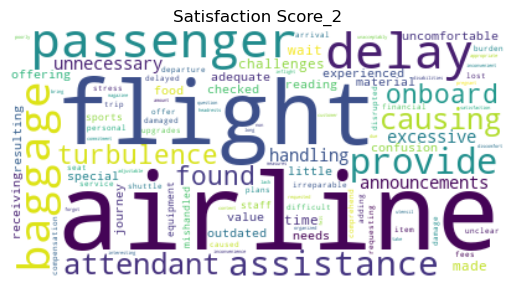

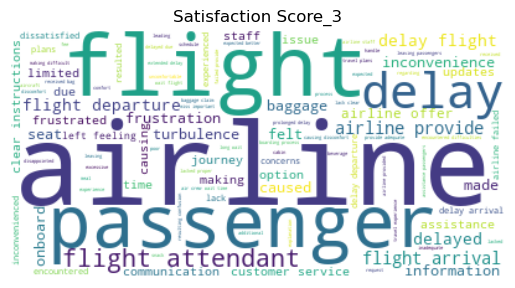

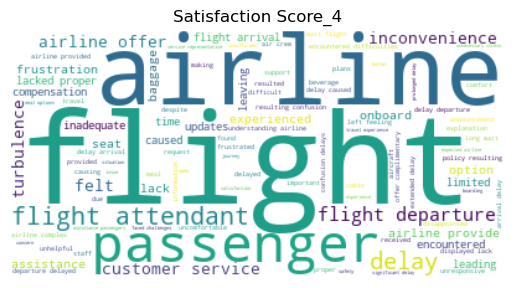

In [9]:
df1['satisfaction score'].unique()


for i in range(5): 
    text = ' '.join([word for word in df1['voice of customer'].loc[df1['satisfaction score'] == i]])
    wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    title = f'Satisfaction Score_{i}'
    plt.title(title)

    plt.savefig(f"./images/{title}.png")
    plt.show()

In [10]:
df1['satisfaction'].unique()

array(['neutral or dissatisfied'], dtype=object)